# KNN: K-Nearest Neighbors + Protocolos

Importamos las librerías que vamos a utilizar

In [2]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns

Vamos a ignorar los warnings que no son importantes para lo que vamos a hacer

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Entendimiento de los datos

Cargamos los datos para entenderlos

In [4]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

El dataset esta guardado en una clase de scikit-learn llamada Bunch. Vamos a ver como accedemos a los datos.

In [5]:
print("variables independientes: ", iris.feature_names, iris.data.shape)
print("variable dependiente: ", iris.target_names, iris.target.shape)

variables independientes:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] (150, 4)
variable dependiente:  ['setosa' 'versicolor' 'virginica'] (150,)


Creamos una sola estructura con todos los datos para poder visualizarlos más fácilmente

In [6]:
x = iris.data
y = iris.target

In [7]:
y = np.expand_dims(y, axis=1)

In [8]:
data = np.concatenate((x, y), axis = 1)
data[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [9]:
y=np.squeeze(y)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
d = pd.DataFrame(data)
labels = iris.feature_names.copy()
labels.append('species')
d.columns=labels
d['species'] = d['species'].astype(int).astype('str')
#str(d['species'])
d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Clasificación a partir de K-NN

El algoritmo de K-NN requiere la especificación del parámetro K, con el número de vecinos que se considerarán para tomar la decisión de clasificación (recuerden que K-NN también permite hacer regresión).

A partir de las cuatro variables independientes (largo y ancho de pétalo y de sépalo), vamos a determinar la especie de la flor usando K-NN.
Definimos un valor de K=5 y utilizamos el mismo dataset de 150 instancias para evaluar los resultados del algoritmo (las clases predichas), comparándolos con los reales (especies reales de cada registro).


In [27]:
k=5
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)

KNeighborsClassifier()

Ya tenemos el modelo "aprendido" con el dataset de 150 instancias de Iris.
Vamos ahora a evaluarlo sobre ese mismo dataset para poder ver los éxitos y errores de la predicción. 

In [28]:
y_pred = knn.predict(x)
print("Clases reales   : ", y)
print("Clases predichas: ", y_pred)

Clases reales   :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Clases predichas:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Métricas y matriz de confusión

Vemos que hay unos cuantos errores, para poder analizar mejor los resultados, vamos a construir una matriz de confusión y a aplicar métricas de clasificación.

En las filas quedarán las clases reales, en las columnas las predichas.

In [29]:
cm= metrics.confusion_matrix(y, y_pred)
cm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

([<matplotlib.axis.YTick at 0x15b654347d0>,
 [Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')])

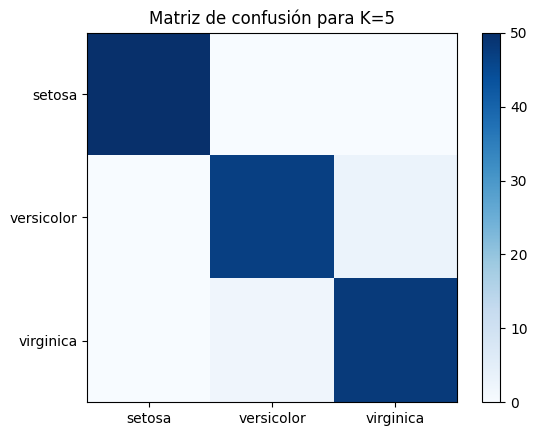

In [30]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)

<font color='red'>Realice las siguientes tareas (para poder hacerlas utilicen cuando puedan sklearn.metrics, sin embargo, para ciertas métricas, es necesario realizar los cálculos a mano):</font>

1. <font color='red'>Obtenga e interprete los resultados de exactitud y kappa.</font>

2. <font color='red'>Para cada una de las clases, calculen e interpreten los valores de las métricas de precisión, recall, especificidad, f1 score.</font>

3. <font color='red'>Intenten con otros valores de K, y encuentren el mejor modelo K-NN.</font>

In [31]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", iris.target_names[0])
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", iris.target_names[1])
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[1], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", iris.target_names[2])
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[2], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[2], average='macro'))
VN = np.sum(cm[0:2,0:2])
FP = np.sum(cm[2,0:2])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[2], average='macro'))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Exactitud:  0.9666666666666667
Kappa    :  0.95
-------------------------------------
Metricas para la categoría  setosa
Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0
-------------------------------------
Metricas para la categoría  versicolor
Precisión     :  0.9591836734693877
Recall        :  0.94
Especificidad :  0.98
F1-score      :  0.9494949494949495
-------------------------------------
Metricas para la categoría  virginica
Precisión     :  0.9411764705882353
Recall        :  0.96
Especificidad :  0.9797979797979798
F1-score      :  0.9504950495049505


Obtuvimos un muy buen nivel de exactitud del 96.7% evaluando sobre el mismo set de aprendizaje.
Ademas muy buenos scores globales para todas las clases. De hecho, la clase setosa se pudo tratar a la perfección.

Intentemos con otros valores de  K.

In [33]:
ks=[1,3,5,7,9,11,15,30,50,100]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y, y_pred))

Con K =  1 , exactitud:  1.0
Con K =  3 , exactitud:  0.96
Con K =  5 , exactitud:  0.9666666666666667
Con K =  7 , exactitud:  0.9733333333333334
Con K =  9 , exactitud:  0.98
Con K =  11 , exactitud:  0.9733333333333334
Con K =  15 , exactitud:  0.9866666666666667
Con K =  30 , exactitud:  0.9533333333333334
Con K =  50 , exactitud:  0.94
Con K =  100 , exactitud:  0.66


Los resultados anteriores nos llevarían a pensar que con K=1 se obtiene un modelo con una predicción "perfecta".

Como lo veremos a continuación. Este no es para nada el caso, pues estamos violando una de las máximas de la evaluación de los modelos de aprendizaje supervisado: evaluar sobre el mismo set de entrenamiento.

Esta evaluación produce resultados que subestiman el error de aprendizaje, y no da una indicación clara del poder de generalización del modelo sobre datos diferentes a los encontrados durante el proceso de aprendizaje.

## Protocolos de evaluación

Vamos ahora a evaluar los modelos que calculamos con diferentes protocolos de evaluación para tener una idea más clara de la calidad de los mismos, e identificar posibles casos de modelos que sufren de overfitting (sobreaprendizaje).

### Holdout (split)

Vamos a separar el dataset en 2 partes: 60% de los datos se van a utilizar para aprender, 40% para evaluar el modelo de clasificación.
Utilizamos el método *train_test_split* de scikit-learn, que se encarga de hacer el particionamiento aleatorio: 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=55, stratify=y)

Los parámetros de este método son:
- train_size o test_size: define la proporción del dataset que se irán al training set o al test set.
- random_state: define la **semilla** a utilizar para incializar el generador de números pseudo-aleatorios. Se requiere que los resultados obtenidos con la partición sean eventualmente reproducibles. La semilla aleatoria debe inicalizarse en el mismo valor para obtener los mismos resultados.
- stratify: indica un array con los valores de una variable que se quiere tener en cuenta en el particionamiento, de tal manera que las proporciones originales se conserven después de la partición.

In [39]:
k_vec= np.arange(1,31,2)
k_vec

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [40]:
acc_train_vec=[]
acc_test_vec=[]
k_vec= np.arange(1,31,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
print(acc_train_vec)
print(acc_test_vec)
print(k_vec)

[1.0, 0.9555555555555556, 0.9777777777777777, 0.9666666666666667, 0.9666666666666667, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9333333333333333, 0.9222222222222223, 0.9222222222222223, 0.9222222222222223, 0.9333333333333333, 0.9444444444444444, 0.9333333333333333]
[0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.95, 0.9666666666666667, 0.95, 0.9666666666666667, 0.9333333333333333, 0.95, 0.95, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.95, 0.9666666666666667]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


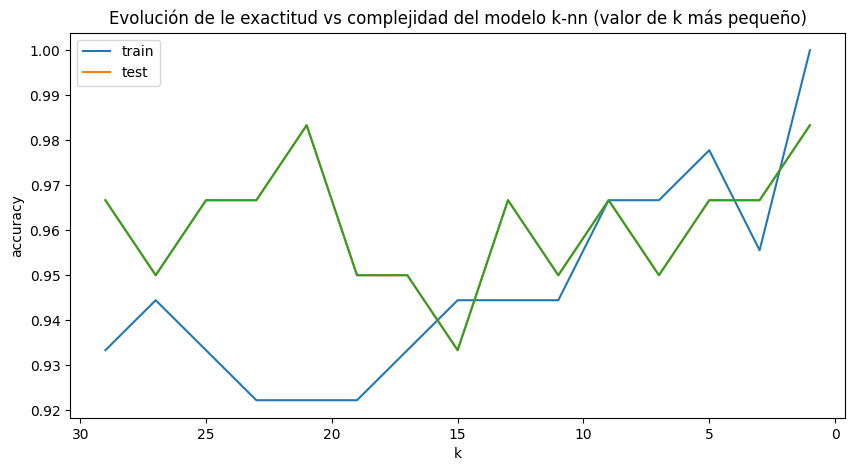

In [41]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

Vemos que con k=1, encontramos la mayor tasa de exactitud cuando se valua con el training set, pero con el test set hallamos el mejor desempeño con k=3.

Hay que tener en cuenta que estos resultados se obtuvieron con un mismo particionamiento aleatorio, que esta muy sujeto a incertidumbre. ¿Qué pasaría si se repite este procedimiento con otros particionamientos?

<font color='red'>**TODO:** Realicen varias particiones aleatorias con las mismas proporciones y evalúe los resultados del modelo.</font>

### K-fold cross-validation

Este protocolo de evaluación consiste en dividir el dataset en K pedazos de igual tamaño, y analizar el rendimiento de un modelo aprendido que va rotando sobre k-1 subconjuntos y evaluado en el subconjunto faltante (El K del K-fold no tiene niguna relación con el K del K-NN). 
En el caso de clasificación, particionamiento se hace aleatoriamente y de manera estratificada con respecto a la variable objetivo.
Las métricas finales son las agregaciones de las evaluaciones de los K modelos.

#### cross_val_score

*scikit-learn* conta con una función que permite repetir el proceso de particionamiento y evaluación del K-fold CV. Se trata de **cross_val_score**, que recibe los siguientes parámetros:
- la instancia del modelo que se quiere evaluar, 
- los datos de las variables independiente, 
- los datos reales de la variable dependiente, 
- cv: el número de veces que se va a repetir el proceso de cross-validation
- scoring: la métrica que se desea evaluar

In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
exactitudes = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
exactitudes

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

Vemos que los scores de las 10 iteraciones del CV dan resultados entre 86.7% y 100%.

#### cross_validate

El problema es que con este método solo se puede evaluar una sola métrica a la vez, y que debe ser una métrica global, o tratar una clasificación binaria.

El método **cross_validate** permite evaluar mas de una métrica a la vez, pero en el caso de categorías que no sean binarias, las métricas de precision, recall y f1 son agregadas. La salida de este método es un directorio con las métricas resultantes, que además incluye el tiempo de aprendizaje y de evaluación de cada iteración.

In [42]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_validate(knn, x, y, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))

fit_time: 0.00
score_time: 0.01
test_accuracy: 0.97
test_precision_weighted: 0.97
test_recall_weighted: 0.97
test_f1_weighted: 0.97


#### Iteradores de cross-validation: KFold, StratifiedKFold, LeaveOneOut

Podemos utilizar también clases específicas para los particionamientos de los datos que permiten mucha más flexibilidad. Las clases **KFold**, **RepeatedKFold**, y **LeaveOneOut** se limitan a crear iteradores que retornan los subconjuntos de training y test.

Es importante anotar que estos iteradores parten del supuesto de independencia de los registros, por lo que es necesario barajarlos previamente.

KFold solo particiona los datos en subconjuntos de items.

In [43]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10, shuffle=True)
acc_test_vec=[]
for indices_train, indices_test in kf.split(x):
    knn.fit(x[indices_train], y[indices_train])
    y_pred = knn.predict(x[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y[indices_test], y_pred))  
acc_test_vec

[0.8666666666666667,
 1.0,
 1.0,
 0.8666666666666667,
 1.0,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 1.0]

Un caso particular es cuando el K del KFold es igual al tamaño de la muestra. En tal caso, se obtiene un protocolo de LeaveOneOut. En este caso los resultados para cada test set (de tamaño 1) solo pueden ser del 100% o del 0%.

In [44]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
loocv = LeaveOneOut()
acc_test_vec=[]
for indices_train, indices_test in loocv.split(x):
    print("%s %s" % (indices_train, indices_test))
    knn.fit(x[indices_train], y[indices_train])
    y_pred = knn.predict(x[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y[indices_test], y_pred))  
np.mean(acc_test_vec)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

np.float64(0.96)

Una mejora se logra con el StratifiedKFold, pues se tiene en cuenta las proporciones de la variable objetivo en la partición, controlando un poco un posible sesgo en la aleatoriedad.

In [45]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
acc_test_vec=[]
for indices_train, indices_test in kf.split(x, y):
    knn.fit(x[indices_train], y[indices_train])
    y_pred = knn.predict(x[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y[indices_test], y_pred))  
acc_test_vec

[1.0,
 0.9333333333333333,
 1.0,
 0.9333333333333333,
 1.0,
 0.8666666666666667,
 1.0,
 0.9333333333333333,
 0.9333333333333333,
 1.0]

In [46]:
np.mean(acc_test_vec)

np.float64(0.96)